In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
x_train = np.arange(20).reshape(-1,2)

In [11]:
x_train

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])

In [12]:
y_train = np.array([0,1,1,0,0,1,1,1,1,0])

In [13]:
y_train.shape

(10,)

In [14]:
x_train.shape

(10, 2)

In [15]:
#可视化
print(x_train[y_train==0,0])

[ 0  6  8 18]


In [16]:
print(x_train[y_train==0,1])

[ 1  7  9 19]


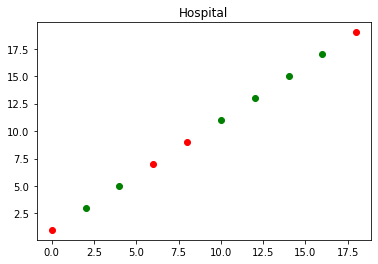

In [17]:
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0,1],color='r')
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1,1],color='g')
plt.title("Hospital")
plt.show()


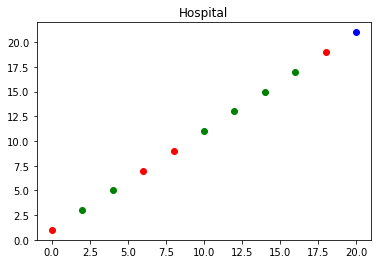

In [18]:
#单独绘制一个点
x = np.array([20, 21])
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0,1],color='r')
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1,1],color='g')
plt.scatter(x[0], x[1], color='b')
plt.title("Hospital")
plt.show()

## 模拟实现 kNN 的过程

## 1. k 2. 距离计算 3. 下标排序 4. 统计 5. 可视化

In [19]:
k = 3
from math import sqrt

distances = []
for each_x_train in x_train:
    d = sqrt(np.sum((each_x_train - x) ** 2))
    distances.append(d)
    

In [20]:
distances

[28.284271247461902,
 25.45584412271571,
 22.627416997969522,
 19.79898987322333,
 16.97056274847714,
 14.142135623730951,
 11.313708498984761,
 8.48528137423857,
 5.656854249492381,
 2.8284271247461903]

In [21]:
np.sort(distances)

array([ 2.82842712,  5.65685425,  8.48528137, 11.3137085 , 14.14213562,
       16.97056275, 19.79898987, 22.627417  , 25.45584412, 28.28427125])

In [22]:
np.argsort(distances) #知道距离排序不能解决应用问题，我需要知道的是哪几个点 

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [23]:
nearest = np.argsort(distances)

In [24]:
nearest[:k]

array([9, 8, 7])

In [25]:
for i in nearest[:k]:
    print(i)

9
8
7


In [26]:
topK_y = [y_train[i] for i in nearest[:k]]
y_train


array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [27]:
topK_y

[0, 1, 1]

### 统计

In [28]:
from collections import Counter

In [29]:
Counter(topK_y) #统计 返回字典

Counter({0: 1, 1: 2})

In [30]:
votes = Counter(topK_y)

In [31]:
votes

Counter({0: 1, 1: 2})

In [32]:
votes.most_common(1) #最多的几个元素 数组 

[(1, 2)]

In [33]:
votes.most_common(1)[0]

(1, 2)

In [34]:
votes.most_common(1)[0][0]

1

In [35]:
predict_y = votes.most_common(1)[0][0]

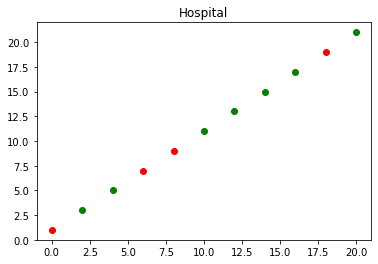

In [36]:
if predict_y == 0 :
    color = 'r'
else:
    color = 'g'

plt.scatter(x_train[y_train==0, 0], x_train[y_train==0,1],color='r')
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1,1],color='g')
plt.scatter(x[0], x[1], color=color)
plt.title("Hospital")
plt.show()


## scikit-learn中使用 kNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
kNN_classifier = KNeighborsClassifier(n_neighbors = 3) #k

In [39]:
kNN_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
#⚠️预测点 一维 [20,23] [[20,21]] #多个点
x = np.array([20,21,23,24,25,26]).reshape(-1,2)
x

array([[20, 21],
       [23, 24],
       [25, 26]])

##### predict

In [41]:
y_predict = kNN_classifier.predict(x)

In [42]:
y_predict

array([1, 1, 1])

## 运行自己封装的 kNN

In [46]:
%run playML/kNN.py

In [47]:
knn_clf = KNNClassifier(k=3)

In [48]:
knn_clf.fit(x_train, y_train)

In [49]:
y_predict = knn_clf.predict(x)

In [50]:
y_predict

array([1, 1, 1])

# 真实的数据集练习

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## 1) 导入数据

In [52]:
iris = datasets.load_iris()
x = iris.data

In [53]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [54]:
x.shape

(150, 4)

In [55]:
y = iris.target

In [56]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [57]:
y.shape

(150,)

#### train test split

In [58]:
# 1. 乱序

In [59]:
shuffle_indexes = np.random.permutation(len(x))
shuffle_indexes

array([  2,  68,  31,   9, 148,  70,  66, 137, 141,  33,  36, 116,  51,
        21,  30,   6, 121,  79,  41, 124,  83,  57,  14,  84,  82,  53,
        19,  95,   8,  55,  17,  34, 145, 132,  59,  56,  11,   0,  63,
        94,  65, 118,  76,  44, 138, 112, 135, 100, 122,  64,  50,  23,
        90, 120, 114,  12,  97,  69, 108,  49,  89,  88, 130,  67,  87,
       110,  18, 129,  99,  98, 119,  26,  42, 127,  58, 139, 136, 101,
       103,  16, 123,  35,   4,  92,  60,  72,  40,  52,  86, 125, 147,
       106, 144,   5,  73,  80,  27, 104,  77,  93,  32,  22,  71,  38,
        24, 113,  96,  43,  81,  78,  75,   3, 128,  37, 133, 117, 146,
       131, 107,  20,  91, 134,  74, 143,   1,  46,  28,  29,  85,  45,
        47,  25, 105, 115,  39, 102, 111,  62,  48,  13, 140, 109,   7,
       149,  54,  10, 126,  15, 142,  61])

In [60]:
#2. 测试集获取

In [61]:
test_ratio = 0.2 
test_size = (int)(len(x) * test_ratio) #有可能是浮点 

In [62]:
# 3. 获取测试集的下标

In [63]:
test_indexes = shuffle_indexes[:test_size]
train_indexes = shuffle_indexes[test_size:]

In [64]:
test_indexes

array([  2,  68,  31,   9, 148,  70,  66, 137, 141,  33,  36, 116,  51,
        21,  30,   6, 121,  79,  41, 124,  83,  57,  14,  84,  82,  53,
        19,  95,   8,  55])

In [65]:
train_indexes

array([ 17,  34, 145, 132,  59,  56,  11,   0,  63,  94,  65, 118,  76,
        44, 138, 112, 135, 100, 122,  64,  50,  23,  90, 120, 114,  12,
        97,  69, 108,  49,  89,  88, 130,  67,  87, 110,  18, 129,  99,
        98, 119,  26,  42, 127,  58, 139, 136, 101, 103,  16, 123,  35,
         4,  92,  60,  72,  40,  52,  86, 125, 147, 106, 144,   5,  73,
        80,  27, 104,  77,  93,  32,  22,  71,  38,  24, 113,  96,  43,
        81,  78,  75,   3, 128,  37, 133, 117, 146, 131, 107,  20,  91,
       134,  74, 143,   1,  46,  28,  29,  85,  45,  47,  25, 105, 115,
        39, 102, 111,  62,  48,  13, 140, 109,   7, 149,  54,  10, 126,
        15, 142,  61])

In [66]:
x_train = x[train_indexes]
y_train = y[train_indexes]
x_test = x[test_indexes]
y_test = y[test_indexes]

In [67]:
y_train

array([0, 0, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0,
       1, 2, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 2, 0, 0, 2,
       1, 2, 2, 2, 2, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 0, 2, 0, 2, 1])

In [68]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 使用封装

In [82]:
import numpy as np
from playML.model_selection import train_test_split
from playML import *
# from sklearn.model_selection import train_test_split

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
y_train.shape

(30, 4)

In [84]:
x_test.shape

(120,)

In [85]:
my_knn_clf = KNNClassifier(k = 3) 
my_knn_clf.fit(x_train, x_test)

In [87]:
y_predict = my_knn_clf.predict(y_train)

In [88]:
y_predict

array([2, 0, 0, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       0, 0, 1, 2, 1, 0, 0, 2])

In [89]:
y_test

array([2, 0, 0, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0, 2, 0,
       0, 0, 1, 2, 1, 0, 0, 1])

In [91]:
sum(y_predict == y_test)

28

In [92]:
sum(y_predict == y_test) / len(y_test)

0.9333333333333333